In [224]:
import warnings
warnings.filterwarnings('ignore')

In [225]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
#lead_df = pd.read_csv("Leads.csv")
lead_df = pd.read_csv(r"C:\Users\Ajay Bharambe\Desktop\Lead Scoring Assignment\Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [227]:
lead_df.shape

(9240, 37)

In [228]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [229]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [230]:

lead_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

#Converting 'Select' values to NaN.

lead_df = lead_df.replace('Select', np.nan)


In [231]:
lead_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [232]:


#checking percentage of null values in each column

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)


Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [233]:
cols = lead_df.columns

for i in cols:
    if((100*(lead_df[i].isnull().sum()/len(lead_df.index))) >= 40):
        lead_df.drop(i, 1, inplace = True)

lead_df.drop('Tags', 1, inplace = True)

### Step 3: Data Preparation


In [234]:
lead_df['City'].value_counts(dropna=False)


NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [235]:
lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')

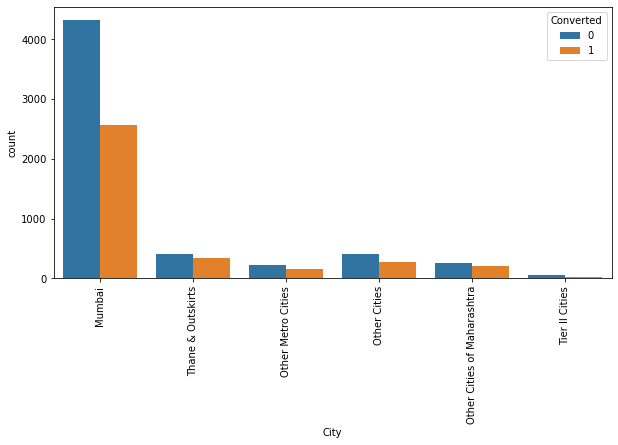

In [236]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(lead_df.City, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [237]:
len(lead_df[lead_df['City'] == 'Mumbai'])/lead_df.shape[0]

0.7457792207792208

In [238]:
lead_df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Kuwait                     4
Canada                     4
Nigeria                    4
Sweden                     3
Ghana                      2
Netherlands                2
Asia/Pacific Region        2
Bangladesh                 2
Italy                      2
China                      2
Belgium                    2
Philippines                2
Uganda                     2
Tanzania                   1
Sri Lanka                  1
Vietnam                    1
Malaysia                   1
Denmark                    1
Russia        

In [239]:
lead_df['Country'] = lead_df['Country'].replace(np.nan,'India')
# Replacing NaN with mode of all the countries -> India

lead_df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Germany                    4
Kuwait                     4
Sweden                     3
China                      2
Philippines                2
Netherlands                2
Asia/Pacific Region        2
Bangladesh                 2
Italy                      2
Belgium                    2
Uganda                     2
Ghana                      2
Malaysia                   1
Denmark                    1
Tanzania                   1
Indonesia                  1
Kenya                      1
Russia                     1
Liberia       

In [240]:
len(lead_df[lead_df['Country'] == 'India'])/lead_df.shape[0]

#97% percentage of india, this will be skewed towards India, so this is better removed from the dataset

0.968939393939394

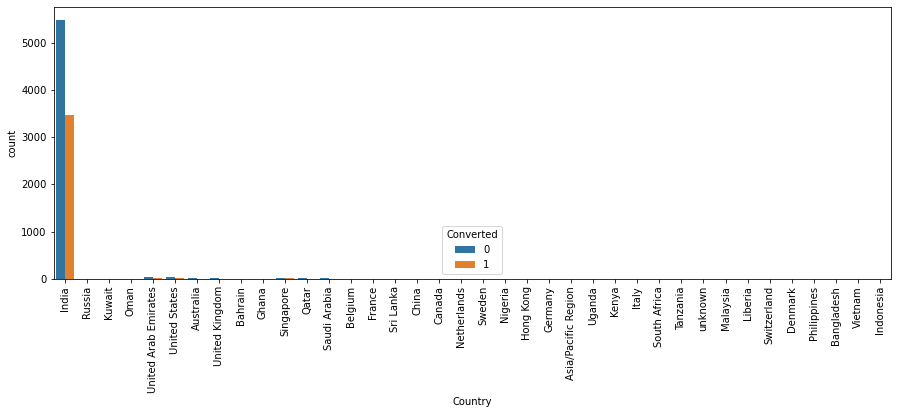

In [241]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Country, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [242]:
lead_df.drop('Country', 1, inplace = True)

In [243]:
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [244]:
#replacing Nan values with Mode "Better Career Prospects"

lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

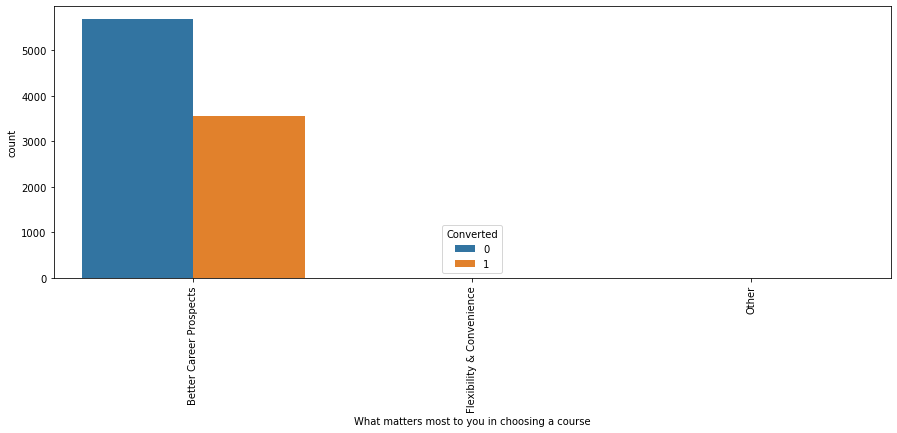

In [245]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['What matters most to you in choosing a course'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [246]:


#checking value counts of variable
lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)



Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [247]:
len(lead_df[lead_df['What matters most to you in choosing a course'] == 'Better Career Prospects'])/lead_df.shape[0]

0.9996753246753247

In [248]:
lead_df.drop('What matters most to you in choosing a course', 1, inplace = True)

In [249]:
lead_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [250]:
#imputing Nan values with mode "Unemployed"

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [251]:
lead_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

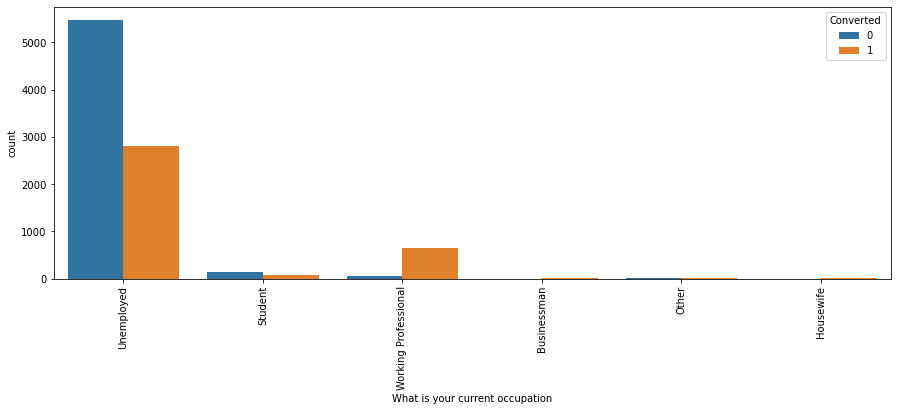

In [252]:
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['What is your current occupation'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [253]:
lead_df.shape

(9240, 25)

In [254]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Not Specified')

In [255]:
#checking percentage of missing values
round(100*(lead_df.isnull().sum()/(lead_df.shape[0])), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [256]:
lead_df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [257]:


#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%,  will not affect the model
lead_df = lead_df.dropna()



In [258]:
#checking percentage of missing values
round(100*(lead_df.isnull().sum()/(lead_df.shape[0])), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [259]:
lead_df.shape


(9074, 25)

In [260]:
lead_df['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

We can drop the **Do Not Call** Column since > 90% is of only value 'No'

In [261]:
lead_df.drop('Do Not Call', 1, inplace = True)

The columns having imbalance in the dataset

In [262]:
lead_df.Search.value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

In [263]:
lead_df['X Education Forums'].value_counts(dropna=False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [264]:
lead_df.Magazine.value_counts(dropna=False)

No    9074
Name: Magazine, dtype: int64

In [265]:
lead_df['Newspaper Article'].value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [266]:
lead_df['Through Recommendations'].value_counts(dropna=False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [267]:
lead_df.Newspaper.value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [268]:
lead_df['Digital Advertisement'].value_counts(dropna=False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [269]:
lead_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [270]:
lead_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [271]:
lead_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [272]:
lead_df['Get updates on DM Content'].value_counts(dropna=False)

No    9074
Name: Get updates on DM Content, dtype: int64

In [273]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9074 non-null   object 
 1   Lead Source                               9074 non-null   object 
 2   Do Not Email                              9074 non-null   object 
 3   Converted                                 9074 non-null   int64  
 4   TotalVisits                               9074 non-null   float64
 5   Total Time Spent on Website               9074 non-null   int64  
 6   Page Views Per Visit                      9074 non-null   float64
 7   Last Activity                             9074 non-null   object 
 8   Specialization                            9074 non-null   object 
 9   What is your current occupation           9074 non-null   object 
 10  Search                              

In [274]:
#adding imbalanced columns to the list of columns to be dropped

cols_drop = []

cols_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])
cols_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [275]:
lead_df = lead_df.drop(cols_drop,1)
lead_df.shape

(9074, 13)

In [276]:
lead_df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not Specified,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not Specified,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not Specified,Unemployed,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Unemployed,Other Metro Cities,No,SMS Sent


### Numerical variables analysis

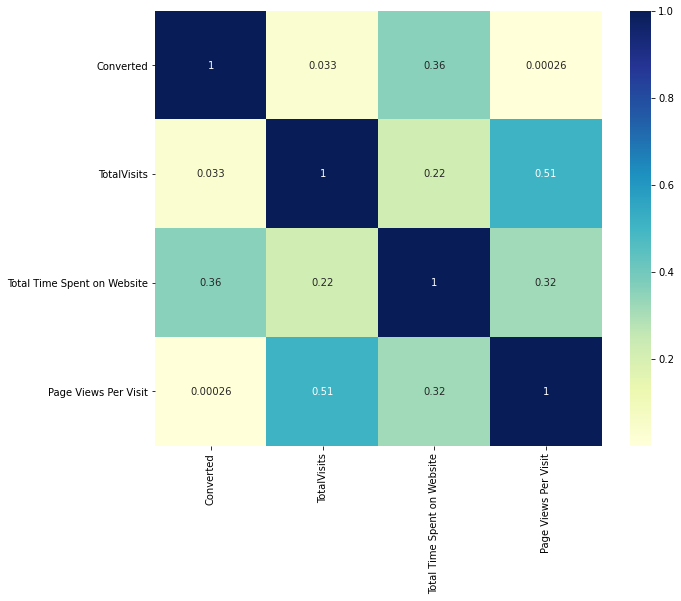

In [277]:
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

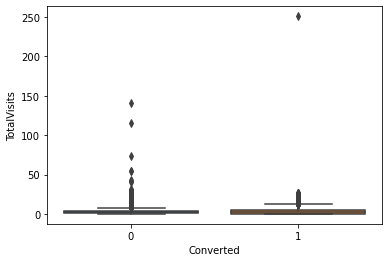

In [278]:
#boxplot of Total Visits vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

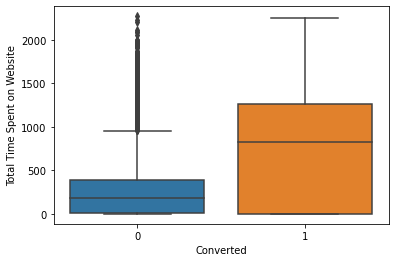

In [279]:
#boxplot of Total Time Spent on Website vs Converted variable

sns.boxplot(x=lead_df.Converted, y=lead_df['Total Time Spent on Website'])
plt.show()

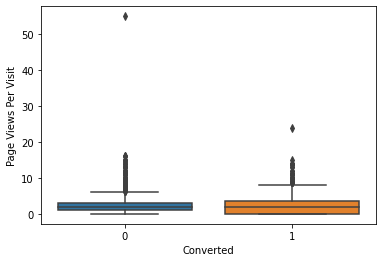

In [280]:
#boxplot of Page Views Per Visit vs Converted variable

sns.boxplot(x=lead_df.Converted,y=lead_df['Page Views Per Visit'])
plt.show()

### Dummy variable creation

In [281]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [282]:
dummy = pd.get_dummies(lead_df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead_df = pd.concat([lead_df, dummy], axis = 1)

In [283]:
dummy1 = pd.get_dummies(lead_df['Lead Source'], prefix  = 'Lead Source', drop_first=True)
lead_df = pd.concat([lead_df, dummy1], axis = 1)

In [284]:
dummy2 = pd.get_dummies(lead_df['Last Activity'], prefix  = 'Last Activity', drop_first=True)
lead_df = pd.concat([lead_df, dummy2], axis = 1)

In [285]:
dummy3 = pd.get_dummies(lead_df['Last Notable Activity'], prefix  = 'Last Notable Activity', drop_first=True)
lead_df = pd.concat([lead_df, dummy3], axis = 1)

In [286]:
dummy4 = pd.get_dummies(lead_df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

lead_df = pd.concat([lead_df,dummy4],1)

In [287]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 95 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9074 non-null   object 
 1   Lead Source                                           9074 non-null   object 
 2   Do Not Email                                          9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Last Activity                                         9074 non-null   object 
 8   Specialization                                        9074

In [288]:

categorical_cols= (['Specialization','Lead Source', 'Last Activity', 'Last Notable Activity', 'Lead Origin','What is your current occupation',
                             'City'])
categorical_cols

['Specialization',
 'Lead Source',
 'Last Activity',
 'Last Notable Activity',
 'Lead Origin',
 'What is your current occupation',
 'City']

In [289]:

lead_df.drop(categorical_cols,1,inplace = True)

In [290]:
# this column needs to be droped we duplicate column for same purpose 
lead_df.drop('Lead Source_google', 1, inplace = True)

In [291]:
# this column needs to be droped we duplicate column for same purpose 
lead_df.drop('Last Notable Activity_Had a Phone Conversation', 1, inplace = True)

In [292]:
# this column needs to be droped we duplicate column for same purpose 
lead_df.drop('Last Notable Activity_Olark Chat Conversation', 1, inplace = True)

## Test-train split 

In [293]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead_df['Converted']

y.head()

X=lead_df.drop('Converted', axis=1)

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

## Standard Scaler

In [295]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3563,-0.281723,-0.283641,0.424674,-0.172345,1.470663,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
273,-0.281723,0.311996,-0.334399,0.056606,-0.679966,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1903,-0.281723,-0.283641,-0.706493,-0.172345,-0.679966,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4982,-0.281723,-0.085096,2.419099,0.285556,-0.679966,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3213,-0.281723,-0.085096,-0.323236,0.285556,-0.679966,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [296]:
lead_st = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
lead_st

37.85541106458012

We have almost 37.8% conversion rate.

## Model Building and RFE

In [297]:
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [298]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False])

In [299]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 36),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 49),
 ('A free copy of Mastering The Interview', False, 60),
 ('Specialization_Banking, Investment And Insurance', False, 8),
 ('Specialization_Business Administration', False, 19),
 ('Specialization_E-Business', False, 23),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Finance Management', False, 12),
 ('Specialization_Healthcare Management', False, 17),
 ('Specialization_Hospitality Management', False, 48),
 ('Specialization_Human Resource Management', False, 16),
 ('Specialization_IT Projects Management', False, 15),
 ('Specialization_International Business', False, 20),
 ('Specialization_Marketing Management', False, 11),
 ('Specialization_Media and Advertising', False, 24),
 ('Specialization_Operations Management', False, 10),
 ('Specialization_Retail Management', False, 65),
 ('Specialization_Rural and Agribusiness', False, 9),
 ('S

In [300]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [301]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source

# Assessing the model with StatsModels

In [302]:
#model building through GLM of statsmodel

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2713.5
Date:                Mon, 26 Oct 2020   Deviance:                       5427.0
Time:                        17:12:26   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1305      0.086     -1.515      0.130      -0.299       0.038
Total Time Spent on Website                              1.0845      0.039     27.477      0.000       1.007       1.162
Lead Source_Direct Traffic                              -1.5352      0.113    -13.581      0.000      -1.757      -1.314
Lead Source_Google                                      -1.1548      0.108    -10.679      0.000      -1.367      -0.943
Lead Source_Organic Search                              -1.1903      0.129     -9.220      0.000      -1.443      -0.937
Lead Source_Referral Sites                              -1.5100      0.327     -4.616      0.000      -2.151      -0.869
Lead Source_Welingak Website                             2.4783      1.036      2.392      0.017       0.447       4.509
Last Activity_Converted to Lead                         -1.0136      0.202     -5.029      0.000      -1.409      -0.619
Last Activity_Email Bounced                             -1.8671      0.327     -5.705      0.000      -2.509      -1.226
Last Activity_Form Submitted on Website                 -1.0221      0.385     -2.656      0.008      -1.776      -0.268
Last Activity_Had a Phone Conversation                   2.2357      0.631      3.543      0.000       0.999       3.473
Last Activity_Olark Chat Conversation                   -1.5163      0.158     -9.576      0.000      -1.827      -1.206
Last Notable Activity_SMS Sent                           1.4323      0.079     18.226      0.000       1.278       1.586
Last Notable Activity_Unreachable                        1.6095      0.544      2.957      0.003       0.543       2.676
Lead Origin_Lead Add Form                                2.7263      0.230     11.840      0.000       2.275       3.178
What is your current occupation_Working Professional     2.7073      0.176     15.350      0.000       2.362       3.053
========================================================================================================================
"""

In [303]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3563    0.556539
273     0.161378
1903    0.113896
4982    0.792187
3213    0.158243
7029    0.070889
6579    0.751325
1384    0.159206
6440    0.516244
2369    0.068966
dtype: float64

In [304]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.55653893, 0.16137808, 0.11389625, 0.79218669, 0.15824299,
       0.07088879, 0.75132501, 0.1592055 , 0.51624444, 0.06896576])

### Creating a dataframe with actual converted flag and the predicted probability

In [305]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.556539,3563
1,0,0.161378,273
2,0,0.113896,1903
3,1,0.792187,4982
4,0,0.158243,3213


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [306]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.556539,3563,1
1,0,0.161378,273,0
2,0,0.113896,1903,0
3,1,0.792187,4982,1
4,0,0.158243,3213,0


In [307]:
from sklearn import metrics

In [308]:
# ConfusionMatrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3489  463]
 [ 758 1641]]


In [309]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.807746811525744


### Checking VIF's

In [310]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [311]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead Origin_Lead Add Form,1.47
11,Last Notable Activity_SMS Sent,1.37
5,Lead Source_Welingak Website,1.29
2,Lead Source_Google,1.26
1,Lead Source_Direct Traffic,1.23
0,Total Time Spent on Website,1.18
14,What is your current occupation_Working Profes...,1.16
3,Lead Source_Organic Search,1.12
6,Last Activity_Converted to Lead,1.10
10,Last Activity_Olark Chat Conversation,1.08


### Metrics beyond simply accuracy

In [312]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [313]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6840350145894123

In [314]:
# Let us calculate specificity
TN / float(TN+FP)

0.8828441295546559

In [315]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11715587044534413


In [316]:
# positive predictive value 
print (TP / float(TP+FP))

0.7799429657794676


In [317]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8215210736990817


## Plotting ROC Curve

In [318]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [319]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

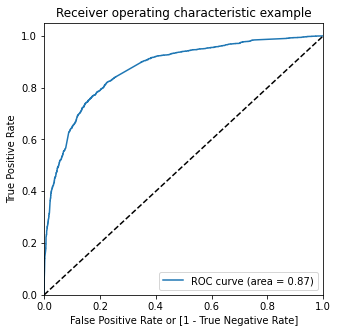

In [320]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [321]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.556539,3563,1,1,1,1,1,1,1,0,0,0,0
1,0,0.161378,273,0,1,1,0,0,0,0,0,0,0,0
2,0,0.113896,1903,0,1,1,0,0,0,0,0,0,0,0
3,1,0.792187,4982,1,1,1,1,1,1,1,1,1,0,0
4,0,0.158243,3213,0,1,1,0,0,0,0,0,0,0,0


In [322]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377736  1.000000  0.000000
0.1   0.1  0.581641  0.965819  0.348431
0.2   0.2  0.730909  0.912464  0.620698
0.3   0.3  0.791529  0.822009  0.773026
0.4   0.4  0.807747  0.751146  0.842105
0.5   0.5  0.807747  0.684035  0.882844
0.6   0.6  0.787593  0.558566  0.926619
0.7   0.7  0.777358  0.488954  0.952429
0.8   0.8  0.758463  0.403918  0.973684
0.9   0.9  0.710439  0.248020  0.991144


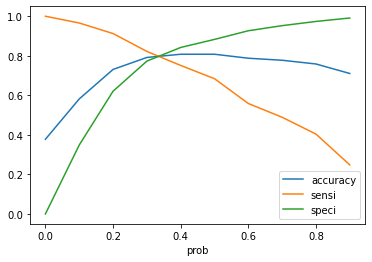

In [323]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [324]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.556539,3563,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.161378,273,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.113896,1903,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.792187,4982,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.158243,3213,0,1,1,0,0,0,0,0,0,0,0,0


In [325]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7959376476145489

In [326]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3158,  794],
       [ 502, 1897]], dtype=int64)

In [327]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [328]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7907461442267611

In [329]:
# Let us calculate specificity
TN / float(TN+FP)

0.7990890688259109

In [330]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20091093117408906


In [331]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7049424005945745


In [332]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8628415300546448


### Precision and Recall

In [333]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3489,  463],
       [ 758, 1641]], dtype=int64)

### Precision

In [334]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7799429657794676

### Recall

In [335]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6840350145894123

In [336]:
from sklearn.metrics import precision_score, recall_score

In [337]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7799429657794676

In [338]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6840350145894123

### Precision And Recall Tradeoff

In [339]:
from sklearn.metrics import precision_recall_curve

In [340]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6346    1
 6347    0
 6348    0
 6349    1
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [341]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

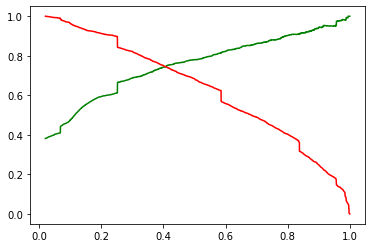

In [342]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [343]:
num_cols1=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols1] = scaler.transform(X_test[num_cols1])

In [344]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Lead Origin_Lead Add Form,What is your current occupation_Working Professional
4870,-0.881378,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3315,1.909330,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5166,-0.881378,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5210,1.656306,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8447,-0.645098,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [345]:
X_test_sm = sm.add_constant(X_test)

In [346]:
y_test_pred = res.predict(X_test_sm)

In [347]:
y_test_pred[:10]

4870    0.252299
3315    0.599884
5166    0.068966
5210    0.826759
8447    0.085858
4976    0.335038
6486    0.874129
8102    0.252299
4394    0.176673
659     0.252299
dtype: float64

In [348]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [349]:
# Let's see the head
y_pred_1.head()

,0
4870,0.252299
3315,0.599884
5166,0.068966
5210,0.826759
8447,0.085858


In [350]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [351]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [352]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [353]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [354]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4870,0.252299
1,1,3315,0.599884
2,0,5166,0.068966
3,1,5210,0.826759
4,0,8447,0.085858


In [355]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [356]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [357]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,4870,0.252299
1,1,3315,0.599884
2,0,5166,0.068966
3,1,5210,0.826759
4,0,8447,0.085858


In [358]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [359]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,4870,0.252299,0
1,1,3315,0.599884,1
2,0,5166,0.068966,0
3,1,5210,0.826759,1
4,0,8447,0.085858,0


In [360]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8152772677194271

In [361]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1427,  260],
       [ 243,  793]], dtype=int64)

In [362]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [363]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7654440154440154

In [364]:
# Let us calculate specificity
TN / float(TN+FP)

0.8458802608180201

In [365]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

In [366]:
Converted_pred = (sum(y_pred_final['final_predicted'])/len(y_pred_final['final_predicted'].index))*100
Converted_pred

38.670583914799856

In [367]:
y_pred_final.drop('Converted',1 , inplace = True)
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100, 2))
y_pred_final.set_index('Prospect ID')



,Converted_Prob,final_predicted,Lead_Score
Prospect ID,,,
4870,0.252299,0,25.23
3315,0.599884,1,59.99
5166,0.068966,0,6.90
5210,0.826759,1,82.68
8447,0.085858,0,8.59
...,...,...,...
8200,0.356693,0,35.67
6943,0.643041,1,64.30
5841,0.068966,0,6.90
